In [1]:
import numpy as np
import torch
from torch import nn, optim
from torchvision import transforms, datasets, models
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from collections import OrderedDict

In [2]:
data_dir = '/Users/js/Desktop/datasets/flower_data'
train_dir = data_dir + '/train'
val_dir = data_dir + '/valid'

In [3]:
data_transforms = transforms.Compose([
    transforms.Resize(320),
    transforms.TenCrop(299),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
    transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean=imagenet_mean, std=imagenet_std)(crop) for crop in crops]))

])

train_dat = datasets.ImageFolder(train_dir, transform=data_transforms)
val_dat = datasets.ImageFolder(val_dir, transform=data_transforms)

train_loader = torch.utils.data.DataLoader(train_dat, batch_size=1, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dat, batch_size=1, shuffle=True, num_workers=4)

In [5]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

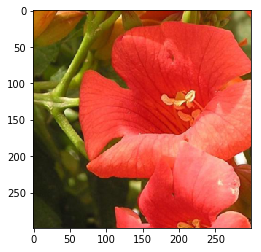

trumpet creeper
tensor([3])


In [22]:
image, label = next(iter(train_loader))
for i in range(10):
    t = image[0][i].numpy().transpose((1,2,0))
    plt.imshow(t)
plt.show()
print(cat_to_name[val_dat.classes[label]])
print(label)

In [18]:
train_dat.classes

['1',
 '10',
 '100',
 '101',
 '102',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [28]:
a = [i for i,j in train_loader]

In [91]:
print(len(train_dat))
print(len(val_dat))

print(len(train_loader))
print(len(val_loader))

print(next(iter(train_loader))[0].shape)
print(next(iter(train_loader))[1].shape)

6552
818
410
52
torch.Size([16, 10, 3, 299, 299])
torch.Size([16])


In [8]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [102]:
model = models.inception_v3(pretrained=True, aux_logits=False)
model

RuntimeError: Error(s) in loading state_dict for Inception3:
	Unexpected key(s) in state_dict: "AuxLogits.conv0.conv.weight", "AuxLogits.conv0.bn.weight", "AuxLogits.conv0.bn.bias", "AuxLogits.conv0.bn.running_mean", "AuxLogits.conv0.bn.running_var", "AuxLogits.conv1.conv.weight", "AuxLogits.conv1.bn.weight", "AuxLogits.conv1.bn.bias", "AuxLogits.conv1.bn.running_mean", "AuxLogits.conv1.bn.running_var", "AuxLogits.fc.weight", "AuxLogits.fc.bias". 

In [94]:
for param in model.parameters():
    param.requires_grad = False

In [95]:
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2048, 1024)),
    ('lrelu1', nn.LeakyReLU()),
    ('drop1', nn.Dropout(p=0.3)),
    ('fc2', nn.Linear(1024, 512)),
    ('lrelu2', nn.LeakyReLU()),
    ('drop2', nn.Dropout(p=0.3)),
    ('fc3', nn.Linear(512, 102)),
    ('out', nn.LogSoftmax())
]))

model.fc = classifier
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [96]:
if torch.cuda.is_available():
    model = model.cuda()
    print('GPU Available')
else: 
    print('Using CPU')

Using CPU


In [97]:
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [99]:
feature, label = next(iter(train_loader))
batch_size, n_crops, channels, height, width = feature.shape
flattened = feature.view(-1, channels, height, width)
output = model.forward(flattened)


/usr/local/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [101]:
output

(tensor([[-4.5769, -4.6495, -4.6939,  ..., -4.7001, -4.5832, -4.5765],
         [-4.6394, -4.7530, -4.6901,  ..., -4.6244, -4.6231, -4.5746],
         [-4.6458, -4.6811, -4.6996,  ..., -4.7151, -4.5553, -4.5963],
         ...,
         [-4.6708, -4.7192, -4.8345,  ..., -4.6931, -4.5831, -4.7160],
         [-4.6326, -4.7722, -4.6924,  ..., -4.6514, -4.5648, -4.5847],
         [-4.6142, -4.6498, -4.8436,  ..., -4.7525, -4.5372, -4.7365]],
        grad_fn=<LogSoftmaxBackward>),
 tensor([[ 1.7329e+00,  7.4421e-01, -1.1067e+00,  ...,  4.3192e-01,
           3.1548e+00, -1.0268e+00],
         [ 1.1791e-01,  2.6035e+00, -2.9847e+00,  ..., -8.3417e-01,
           4.6495e-01, -3.8124e-01],
         [-2.3775e-03,  5.6875e-01, -2.1374e+00,  ..., -4.1118e-01,
           1.8946e+00, -6.4134e-01],
         ...,
         [-5.6019e-01, -1.0204e-01,  6.3849e-01,  ..., -2.4201e+00,
           2.4493e-01,  8.7431e-01],
         [-1.3284e+00, -1.2944e+00, -1.1398e+00,  ..., -3.4186e+00,
          -9.8294e

In [84]:
epochs = 3

for e in range(epochs):
    train_loss = 0
    model.train()
    for feature, label in train_loader:
        if torch.cuda.is_available():
            feature, label = feature.cuda(), label.cuda()
        optimizer.zero_grad()
        batch_size, n_crops, channels, height, width = feature.shape
        output = model(feature.view(-1, channels, height, width))
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    test_loss = 0
    model.eval()
    for feature, label in test_loader:
        if torch.cuda.is_available():
            feature, label = feature.cuda(), label.cuda()
        batch_size, n_crops, channels, height, width = feature.shape
        output = model(feature.view(-1, channels, height, width))
        loss = loss_fn(output, label)
        test_loss += loss.item()
        
    print(f'Epoch: {e+1}/{epochs}  |  Training loss: {train_loss:.6f}  |  Testing loss: {test_loss:.6f}')

Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/l

KeyboardInterrupt: 